In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

def get_human_dataset():
    feature_name_df = pd.read_csv('../../../datasets/uci_har/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    feature_name = list(set(feature_name))

    X_train = pd.read_csv('../../../datasets/uci_har/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('../../../datasets/uci_har/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    y_train = pd.read_csv('../../../datasets/uci_har/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('../../../datasets/uci_har/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

0.9351883271123176


In [7]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20],
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train.values.ravel())

print('최적 하이퍼파라미터 :', grid_cv.best_params_)
print(grid_cv.best_score_)

최적 하이퍼파라미터 : {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
0.8990750816104461


In [9]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print(round(accuracy_score(y_test, pred), 4))

0.9298


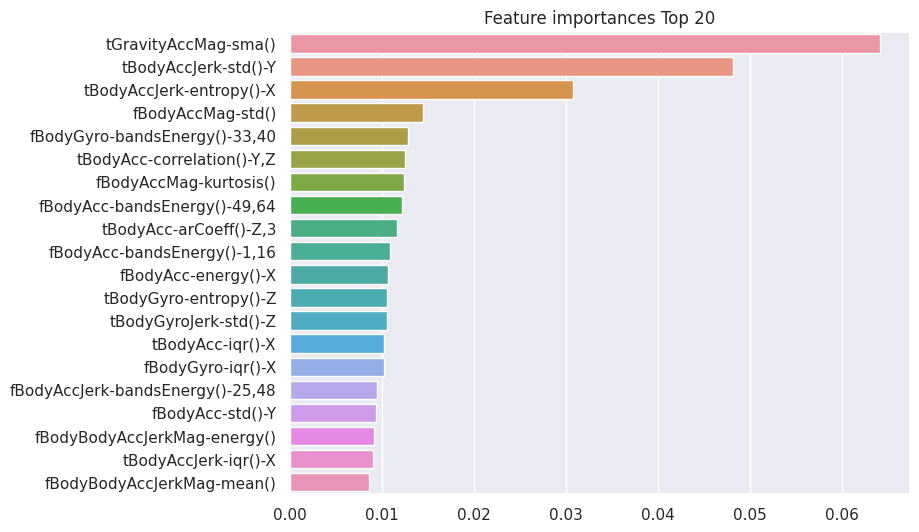

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()